# Assignment2 - Supervised Learning flow


# Part 1(a) Student details:

- Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student.


In [ ]:
# stundent details example: John S. 9812
#                       student details 1: Sagi Nevet 8166
#                       student details 2: Or Hayak 6752
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:

- If you changed the prompt until you got a satisfying answer, please add all versions
- don't delete "pre" tags, so new-line is supported
- double click the following markdown cell to change
- press shift+enter to view
- Add information:


#### Add information in this Markdown cell (double click to change, shift-enter to view)

<pre>   
AI agent name: ChatGPT
Goal: To get a good idea on algorithms that can fit my assignment in an efficient way.

Propmpt1: With the titanic data set what classification algorithms might work well with this and why would they be a good fit?
    
Propmpt2: Explain in simple terms what logistic regression and random forest algorithms are.
    
Propmpt3: What algorithm would be better from the two algorithms you suggested and why is it better than the other??.


AI agent name 2: ChatGPT
Goal: Help decide on how to visualize the data and my findings.

Propmpt1: What kind of charts/plots you think would show the data in a visualized manner that would help understand it better.
    
Propmpt2: Any suggestions on how to best show visually which features made the most impact on the model?.
    
Propmpt3: What would be a good way to visualize the predictions of the model to summarize the findings and results in the best way?

Other assistanse:    
</pre>


## Part 1(c) - Learning Problem and dataset explaination.

- Please explain in one paragraph
- don't delete "pre" tags, so new-line is supported
- double click the following markdown cell to change
- press shift+enter to view
- Add explaining text:


#### Add information in this Markdown cell (double click to change, shift-enter to view)

<pre>

In this assignment I will attempt a classification problem to determine which passengers on the titanic survived the titanic disaster or didn't.
The dataset for this contains various passenger traits and information such as age,sex, if a passenger is a parent or child, number of siblings or spouses and so on...
This information will help train the machine learning model to classify the passengers into categories of 'survived' or 'didn't survive'.


    
</pre>


## Part 2 - Initial Preparations

You could add as many code cells as needed


In [2]:
# Importing necessary libraries for this assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import OneHotEncoder

import math
import statistics
import re

In [ ]:
# Loading train data set.
train = pd.read_csv("titanic_train.csv")
train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [13]:
# Loading test data set.
test = pd.read_csv("titanic_test.csv")
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


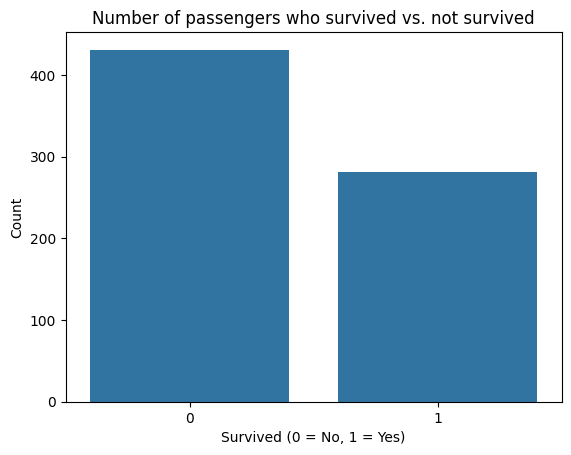

We can see the number of survivors is significantly lower than the number of passengers who didn't survive.


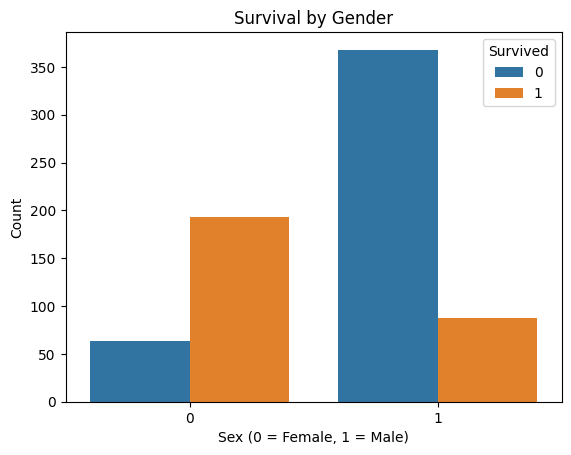

We can see from the plot that many more women survived than men, so the gender of the passengers can play a big part in our model


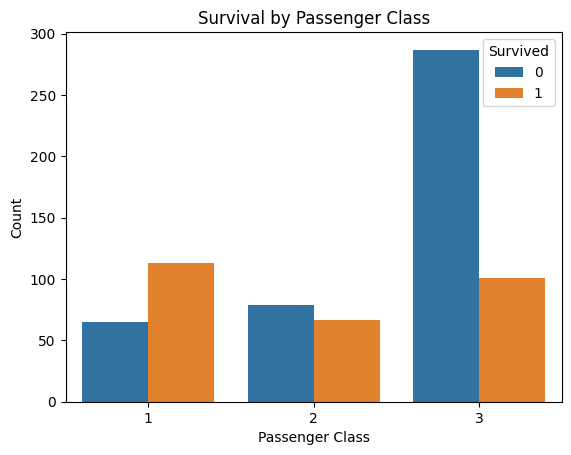

We can also see that most survivors were in the first class, probably the first class due to being luxurious they had more access to survival equipment and were closer to lifeboats and such


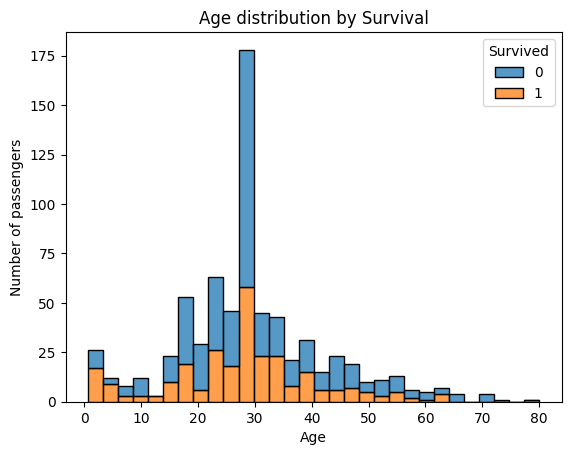

So we can see that most of the deaths were people around the age of 30 which is pretty surprising, maybe we can infer from this information that a big percentage of the passengers were around that age.
Also, most survivors overall were between the ages of 20-35


In [ ]:
# Providing a few plots to help visualize the data we get from the data set.

sns.countplot(x='Survived', data=train)
plt.title("Number of passengers who survived vs. not survived")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
print("We can see the number of survivors is significantly lower than the number of passengers who didn't survive.")

sns.countplot(x='Sex', hue='Survived', data=train)
plt.title("Survival by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()
print("We can see from the plot that many more women survived than men, so the gender of the passengers can play a big part in our model")

sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()
print("We can also see that most survivors were in the first class, probably the first class due to being luxurious they had more access to survival equipment and were closer to lifeboats and such")

sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title("Age distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.show()
print("So we can see that most of the deaths were people around the age of 30 which is pretty surprising, maybe we can infer from this information that a big percentage of the passengers were around that age.")
print("Also, most survivors overall were between the ages of 20-35")


## Part 3 - Experiments

You could add as many code cells as needed


<pre>
 Here we create new features that should help train the model. 
 We are creating a feature called FamilySize which represents the number of family members in a family, this will be attached to each passenger.
 We are also creating a feature  called IsAlone which is a feature that consists only of 0 and 1, 0 means the passenger isn't alone the 1 means he's alone.
 Another feature we will create is called FarePerPerson which is the ticket price divided by number of members in the family. For example it can tell the status of a family/person.
 If they are rich or poor, which can help surivability chances for example.
    
 We are going to use the random forest classifier algorithm and logistic regression classifier algorithm to predict the survival of the passengers

 Logistic regression is a good choice for classification problems since it can handle binary outcomes very well and is easy to work with.
 Random forest is also a good algorithm for this dataset since it can handle categorical variables and is less sensitive to outliers.
</pre>


In [ ]:
# Data preprocessing
train['FamilySize'] = train['SibSp'] + train['Parch']
train['IsAlone'] = (train['FamilySize'] == 0).astype(int)
train['FarePerPerson'] = train['Fare'] / (train['FamilySize'] + 1)
# preparing the data for the model (x and y)
X = train[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'FarePerPerson']]
y = train['Survived']

# We use pipeline to preprocess the data and prevent data leakage during cross validation.
pipe_log = Pipeline([("scale", StandardScaler()),("logreg", LogisticRegression(max_iter=1000))])
param_log = {"logreg__C": [0.01, 0.1, 1, 10]}
grid_log = GridSearchCV(pipe_log, param_log, cv=5, scoring="f1_macro")
grid_log.fit(X, y)

pipe_rf = Pipeline([("scale", StandardScaler()),("rf", RandomForestClassifier(random_state=42))])
param_rf = {"rf__n_estimators": [50, 100], "rf__max_depth": [3, 5, 8]}
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5, scoring="f1_macro")
grid_rf.fit(X, y)

results_log = pd.DataFrame(grid_log.cv_results_)[["params", "mean_test_score"]]
results_rf = pd.DataFrame(grid_rf.cv_results_)[["params", "mean_test_score"]]
results = pd.concat([results_log.assign(Model="Logistic"),results_rf.assign(Model="RandomForest")])
display(results)

,params,mean_test_score,Model
0,{'logreg__C': 0.01},0.764782,Logistic
1,{'logreg__C': 0.1},0.786708,Logistic
2,{'logreg__C': 1},0.785358,Logistic
3,{'logreg__C': 10},0.785358,Logistic
0,"{'rf__max_depth': 3, 'rf__n_estimators': 50}",0.767624,RandomForest
1,"{'rf__max_depth': 3, 'rf__n_estimators': 100}",0.766893,RandomForest
2,"{'rf__max_depth': 5, 'rf__n_estimators': 50}",0.801037,RandomForest
3,"{'rf__max_depth': 5, 'rf__n_estimators': 100}",0.809254,RandomForest
4,"{'rf__max_depth': 8, 'rf__n_estimators': 50}",0.813930,RandomForest
5,"{'rf__max_depth': 8, 'rf__n_estimators': 100}",0.818695,RandomForest


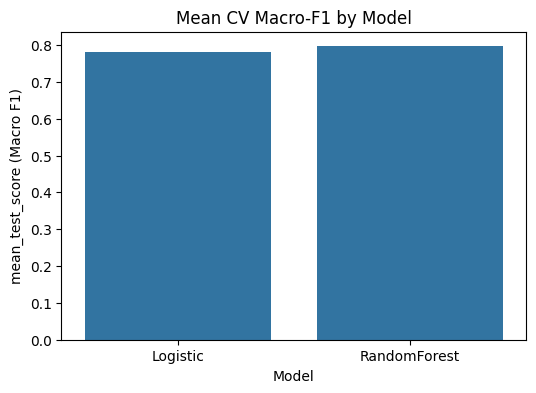

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=results, x="Model", y="mean_test_score", errorbar=None)
plt.title("Mean CV Macro-F1 by Model")
plt.ylabel("mean_test_score (Macro F1)")
plt.xlabel("Model")
plt.show()

<pre>
So we used the logistic regression and random forest algorithms to predict the survival of the passengers,
and we can see that the random forest algorithm performed better than the logistic regression algorithm.
So we will use the random forest model for our final model.
</pre>


## Part 4 - Training

Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)


In [8]:
# We select the best model based on the mean test score from part 3.
# In this case, we will use the Random Forest model as it has a higher mean test score.
# We will now train the best model on the entire training set and evaluate its performance on the test set.

best_model = grid_rf.best_estimator_
best_model.fit(X, y)    

# We retrain the model on the entire training set to ensure that the model has access to all available data for learning, this can help improve the performance of the model.

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=8, random_state=42))])

<pre>
We are training again the model that performed the best from part 3 (Random Forest,  
max_depth = 5, n_estimators = 50) on the entire training set, using the features:
(Pclass, Sex, Age, Fare, FamilySize, IsAlone, FarePerPerson).  
This will provide the final model that will be evaluated on the test data in part 5.

    
</pre>


In [9]:
# We can see the parameters of the Random Forest model we trained.

summary_data = { "Step": ["Preprocessing", "Model", "max_depth", "n_estimators", "Features used"],"Details":
             ["StandardScaler","RandomForestClassifier", best_model.named_steps['rf'].max_depth,  best_model.named_steps['rf'].n_estimators, ", ".join(X.columns)]}
summary_df = pd.DataFrame(summary_data)
display(summary_df)


,Step,Details
0,Preprocessing,StandardScaler
1,Model,RandomForestClassifier
2,max_depth,8
3,n_estimators,100
4,Features used,"Pclass, Sex, Age, Fare, FamilySize, IsAlone, F..."


## Part 5 - Apply on test and show model performance estimation


In [ ]:

# We Apply feature engineering to the test set.
test["FamilySize"] = test["SibSp"] + test["Parch"]
test["IsAlone"] = (test["FamilySize"] == 0).astype(int)
test["FarePerPerson"] = test["Fare"] / (test["FamilySize"] + 1)

# Build X_test with the same columns and order.
X_test = test[["Pclass", "Sex", "Age", "Fare","FamilySize", "IsAlone", "FarePerPerson"]]


# Applying predictions on the test set to get the final results.
y_pred = best_model.predict(X_test)
print("First 5 predictions:", y_pred[:5])

# We begin evaluating the model.
if "Survived" in test.columns:
    from sklearn.metrics import classification_report, f1_score
    y_test = test["Survived"]
    print(classification_report(y_test, y_pred, digits=3))
    print("macro-F1:", f1_score(y_test, y_pred, average="macro"))



First 5 predictions: [0 0 0 1 1]
              precision    recall  f1-score   support

           0      0.883     0.898     0.891       118
           1      0.797     0.770     0.783        61

    accuracy                          0.855       179
   macro avg      0.840     0.834     0.837       179
weighted avg      0.854     0.855     0.854       179

macro-F1: 0.8370448179271709


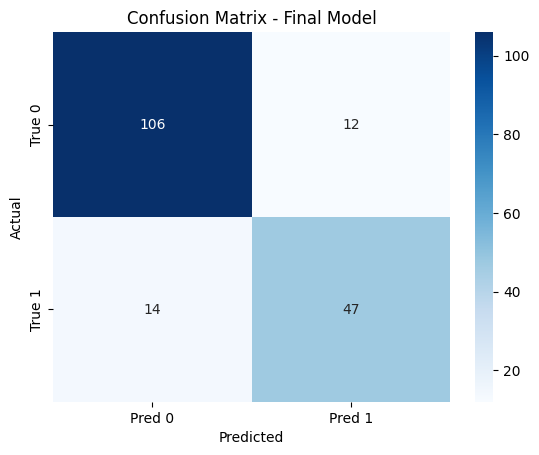

In [ ]:
# I'm creating a confusion matrix to visualize the performance of the model.
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Pred 0','Pred 1'],yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - Final Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<pre>
How to Read This Confusion Matrix:
	                        Pred 0 (Not Survived)	Pred 1 (Survived)
True 0 (Did not survive)	        106	                  12
True 1 (Survived)	                14	                  47

This means that 106 passengers who didn't survive the titanic accident were correctly predicted by the model as not survived.

12 passengers who didn't survive got incorrectly predicted as actual survivors. This was a miss by the model.

14 passengers who did survive got falsely predicted as passengers who didn't survive, another miss by the model.

47 passengers got correctly predicted as true survivors.
</pre>


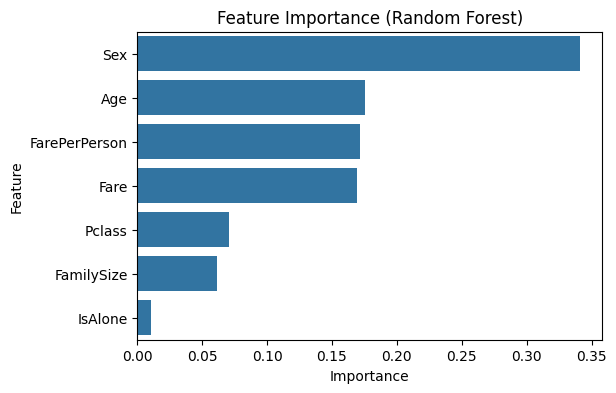

In [ ]:
# Here we show a feature importance plot for the Random Forest model.
# Thus plot will show which features made the most impact on the model's prediciton ability.

rf = best_model.named_steps['rf']       
importances = rf.feature_importances_
feat_names  = X.columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(6,4))
sns.barplot(x=importances[indices],y=np.array(feat_names)[indices],orient='h')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

<pre>
From this plot we can tell that the most important features that contributed to the prediction ability of our model were the 'Sex' and 'Age' features, with 'FarePerPerson' coming in close.

Overall how these features got ranked kind of reflects what we actually know about the titanic, that age,sex and class/wealth of the passengers played a big role on their survival.

</pre>


<pre>
Overall summary of the assignment:

Main take aways regarding features are that the Sex, Age and Fare prices were the most important to help predict the survival or non-survival of passengers.

A passenger being female (we know more females survived than males), younger and possibly wealthier increased their chances of survival.

Family size / or a passenger being alone in the end didn't play as big of a role on how it affected the predictions.

We chose the 'Random forest' model based on it's performance which outperformed logistic regression, it had pretty high accuracy for the prediciton of non survivors for example.

In summary, I think the model I trained did well on realizing the important features and patterns regarding people who survived the titanic, and this assignment helped me understand classification algorithms a bit better.
</pre>
